In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
pd.set_option('max_columns', None)

In [2]:
ca_plotting = pd.read_csv('Data_Marketing_Customer_Analysis_Round2.csv')

In [3]:
def drop_columns(ca_plotting) :
    ca_plotting.drop(columns=["Unnamed: 0", "Customer"], inplace=True)
    return ca_plotting

drop_columns(ca_plotting)

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,Married,117,NaN,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,Suburban,Married,253,NaN,40,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,Urban,Married,65,7.0,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,Rural,Married,201,11.0,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,Urban,Divorced,158,0.0,27,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [4]:
#Change format of effective to date
pd.to_datetime(ca_plotting["Effective To Date"],format="%m/%d/%y")
ca_plotting['month']= pd.DatetimeIndex(ca_plotting['Effective To Date']).month
print(ca_plotting['month'])
ca_plotting.month.value_counts()

0        2
1        1
2        2
3        1
4        1
        ..
10905    1
10906    1
10907    2
10908    2
10909    1
Name: month, Length: 10910, dtype: int64


1    5818
2    5092
Name: month, dtype: int64

In [5]:
#Drop the old column
def drop_effective(ca_plotting) :
    ca_plotting.drop(columns=["Effective To Date"], inplace=True)
    return ca_plotting


drop_effective(ca_plotting)

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type,month
0,Arizona,4809.216960,No,Basic,College,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN,2
1,California,2228.525238,No,Basic,College,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN,1
2,Washington,14947.917300,No,Basic,Bachelor,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,Oregon,22332.439460,Yes,Extended,College,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,Oregon,9025.067525,No,Premium,Bachelor,Medical Leave,F,23675,Suburban,Married,117,NaN,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,Nevada,15563.369440,No,Premium,Bachelor,Unemployed,F,0,Suburban,Married,253,NaN,40,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1
10906,Oregon,5259.444853,No,Basic,College,Employed,F,61146,Urban,Married,65,7.0,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,Arizona,23893.304100,No,Extended,Bachelor,Employed,F,39837,Rural,Married,201,11.0,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN,2
10908,California,11971.977650,No,Premium,College,Employed,F,64195,Urban,Divorced,158,0.0,27,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2


In [6]:
#Change the type of month
ca_plotting['month']= ca_plotting['month'].astype('object')

In [7]:
## Getting rid of the outliers

In [9]:
#Monthly premium auto
#q1
Q1_MPA = np.percentile(ca_plotting['Monthly Premium Auto'], 25)
Q1_MPA

68.0

In [10]:
#q3
Q3_MPA = np.percentile(ca_plotting['Monthly Premium Auto'], 75)
Q3_MPA

109.0

In [11]:
#IQR
IQR_MPA = Q3_MPA - Q1_MPA

In [16]:
data_clean = ca_plotting[((ca_plotting['Monthly Premium Auto'] > (Q1_MPA-1.5*IQR_MPA)) & (ca_plotting['Monthly Premium Auto']< (Q3_MPA+1.5*IQR_MPA)))]


In [17]:
data_clean = data_clean.reset_index(drop=True)

In [18]:
data_clean

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type,month
0,Arizona,4809.216960,No,Basic,College,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN,2
1,California,2228.525238,No,Basic,College,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN,1
2,Washington,14947.917300,No,Basic,Bachelor,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,Oregon,22332.439460,Yes,Extended,College,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,Oregon,9025.067525,No,Premium,Bachelor,Medical Leave,F,23675,Suburban,Married,117,NaN,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10388,California,3579.023825,No,Extended,High School or Below,Employed,F,28304,Suburban,Married,91,10.0,30,2.0,1,Personal Auto,Personal L2,Offer2,Agent,655.200000,Four-Door Car,Medsize,A,1
10389,Arizona,2771.663013,No,Basic,College,Employed,M,59855,Suburban,Married,74,30.0,82,4.0,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,A,1
10390,Oregon,5259.444853,No,Basic,College,Employed,F,61146,Urban,Married,65,7.0,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10391,California,11971.977650,No,Premium,College,Employed,F,64195,Urban,Divorced,158,0.0,27,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2


/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Monthly Premium Auto'>

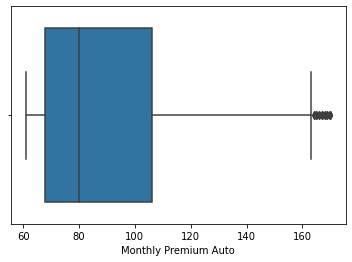

In [19]:
sns.boxplot(data_clean['Monthly Premium Auto'])

In [26]:
## Cleaning column income. Replace 0 with NaN
data_clean['Income']=data_clean['Income'].replace(0,np.nan)

<AxesSubplot:xlabel='Income', ylabel='Count'>

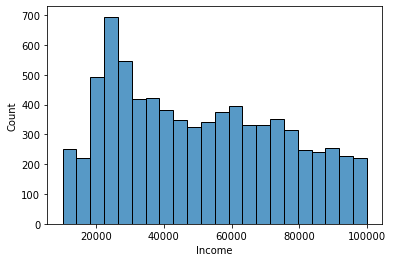

In [27]:
sns.histplot(data_clean['Income'])

In [ ]:
##Split data into categorical features and numerical ones

In [32]:
ca_categoricals = data_clean.select_dtypes(include=['object'])
ca_floats = data_clean.select_dtypes(include=['float64'])
ca_integers = data_clean.select_dtypes(include=['int64'])
ca_numerical = pd.concat([ca_integers,ca_floats], axis=1)

In [33]:
ca_categoricals


,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Vehicle Type,month
0,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN,2
1,California,No,Basic,College,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN,1
2,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A,2
3,Oregon,Yes,Extended,College,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A,1
4,Oregon,No,Premium,Bachelor,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10388,California,No,Extended,High School or Below,Employed,F,Suburban,Married,Personal Auto,Personal L2,Offer2,Agent,Four-Door Car,Medsize,A,1
10389,Arizona,No,Basic,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer2,Branch,Two-Door Car,Medsize,A,1
10390,Oregon,No,Basic,College,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A,1
10391,California,No,Premium,College,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A,2


In [34]:
ca_numerical

,Monthly Premium Auto,Months Since Policy Inception,Number of Policies,Customer Lifetime Value,Income,Months Since Last Claim,Number of Open Complaints,Total Claim Amount
0,61,52,9,4809.216960,48029.0,7.0,0.0,292.800000
1,64,26,1,2228.525238,NaN,3.0,0.0,744.924331
2,100,31,2,14947.917300,22139.0,34.0,0.0,480.000000
3,97,3,2,22332.439460,49078.0,10.0,0.0,484.013411
4,117,31,7,9025.067525,23675.0,NaN,NaN,707.925645
...,...,...,...,...,...,...,...,...
10388,91,30,1,3579.023825,28304.0,10.0,2.0,655.200000
10389,74,82,1,2771.663013,59855.0,30.0,4.0,355.200000
10390,65,68,6,5259.444853,61146.0,7.0,0.0,273.018929
10391,158,27,6,11971.977650,64195.0,0.0,4.0,618.288849
